# There is example of some test from event study package

In [16]:
import numpy as np
import pandas as pd
from multiple_event import skewness_corrected_test, crude_dependence, multiple_cross_sectional_test
from single_event import single_t_test, single_criterion_t_test
from models import max_sharpe_rate_portfolio, min_risk_portfolio_model
from utils import portfolio_plot, market_plot

## Close portfolio from datasets/close_portfolio.csv
### Event date when something happened

In [28]:
close = pd.read_csv('data_import/datasets/close_portfolio.csv', index_col='time')

close['market'] = [close.iloc[i].sum() for i in range(len(close))]

close.index = pd.to_datetime(close.index)

date = pd.to_datetime('2022-02-24 07:00:00+00:00')

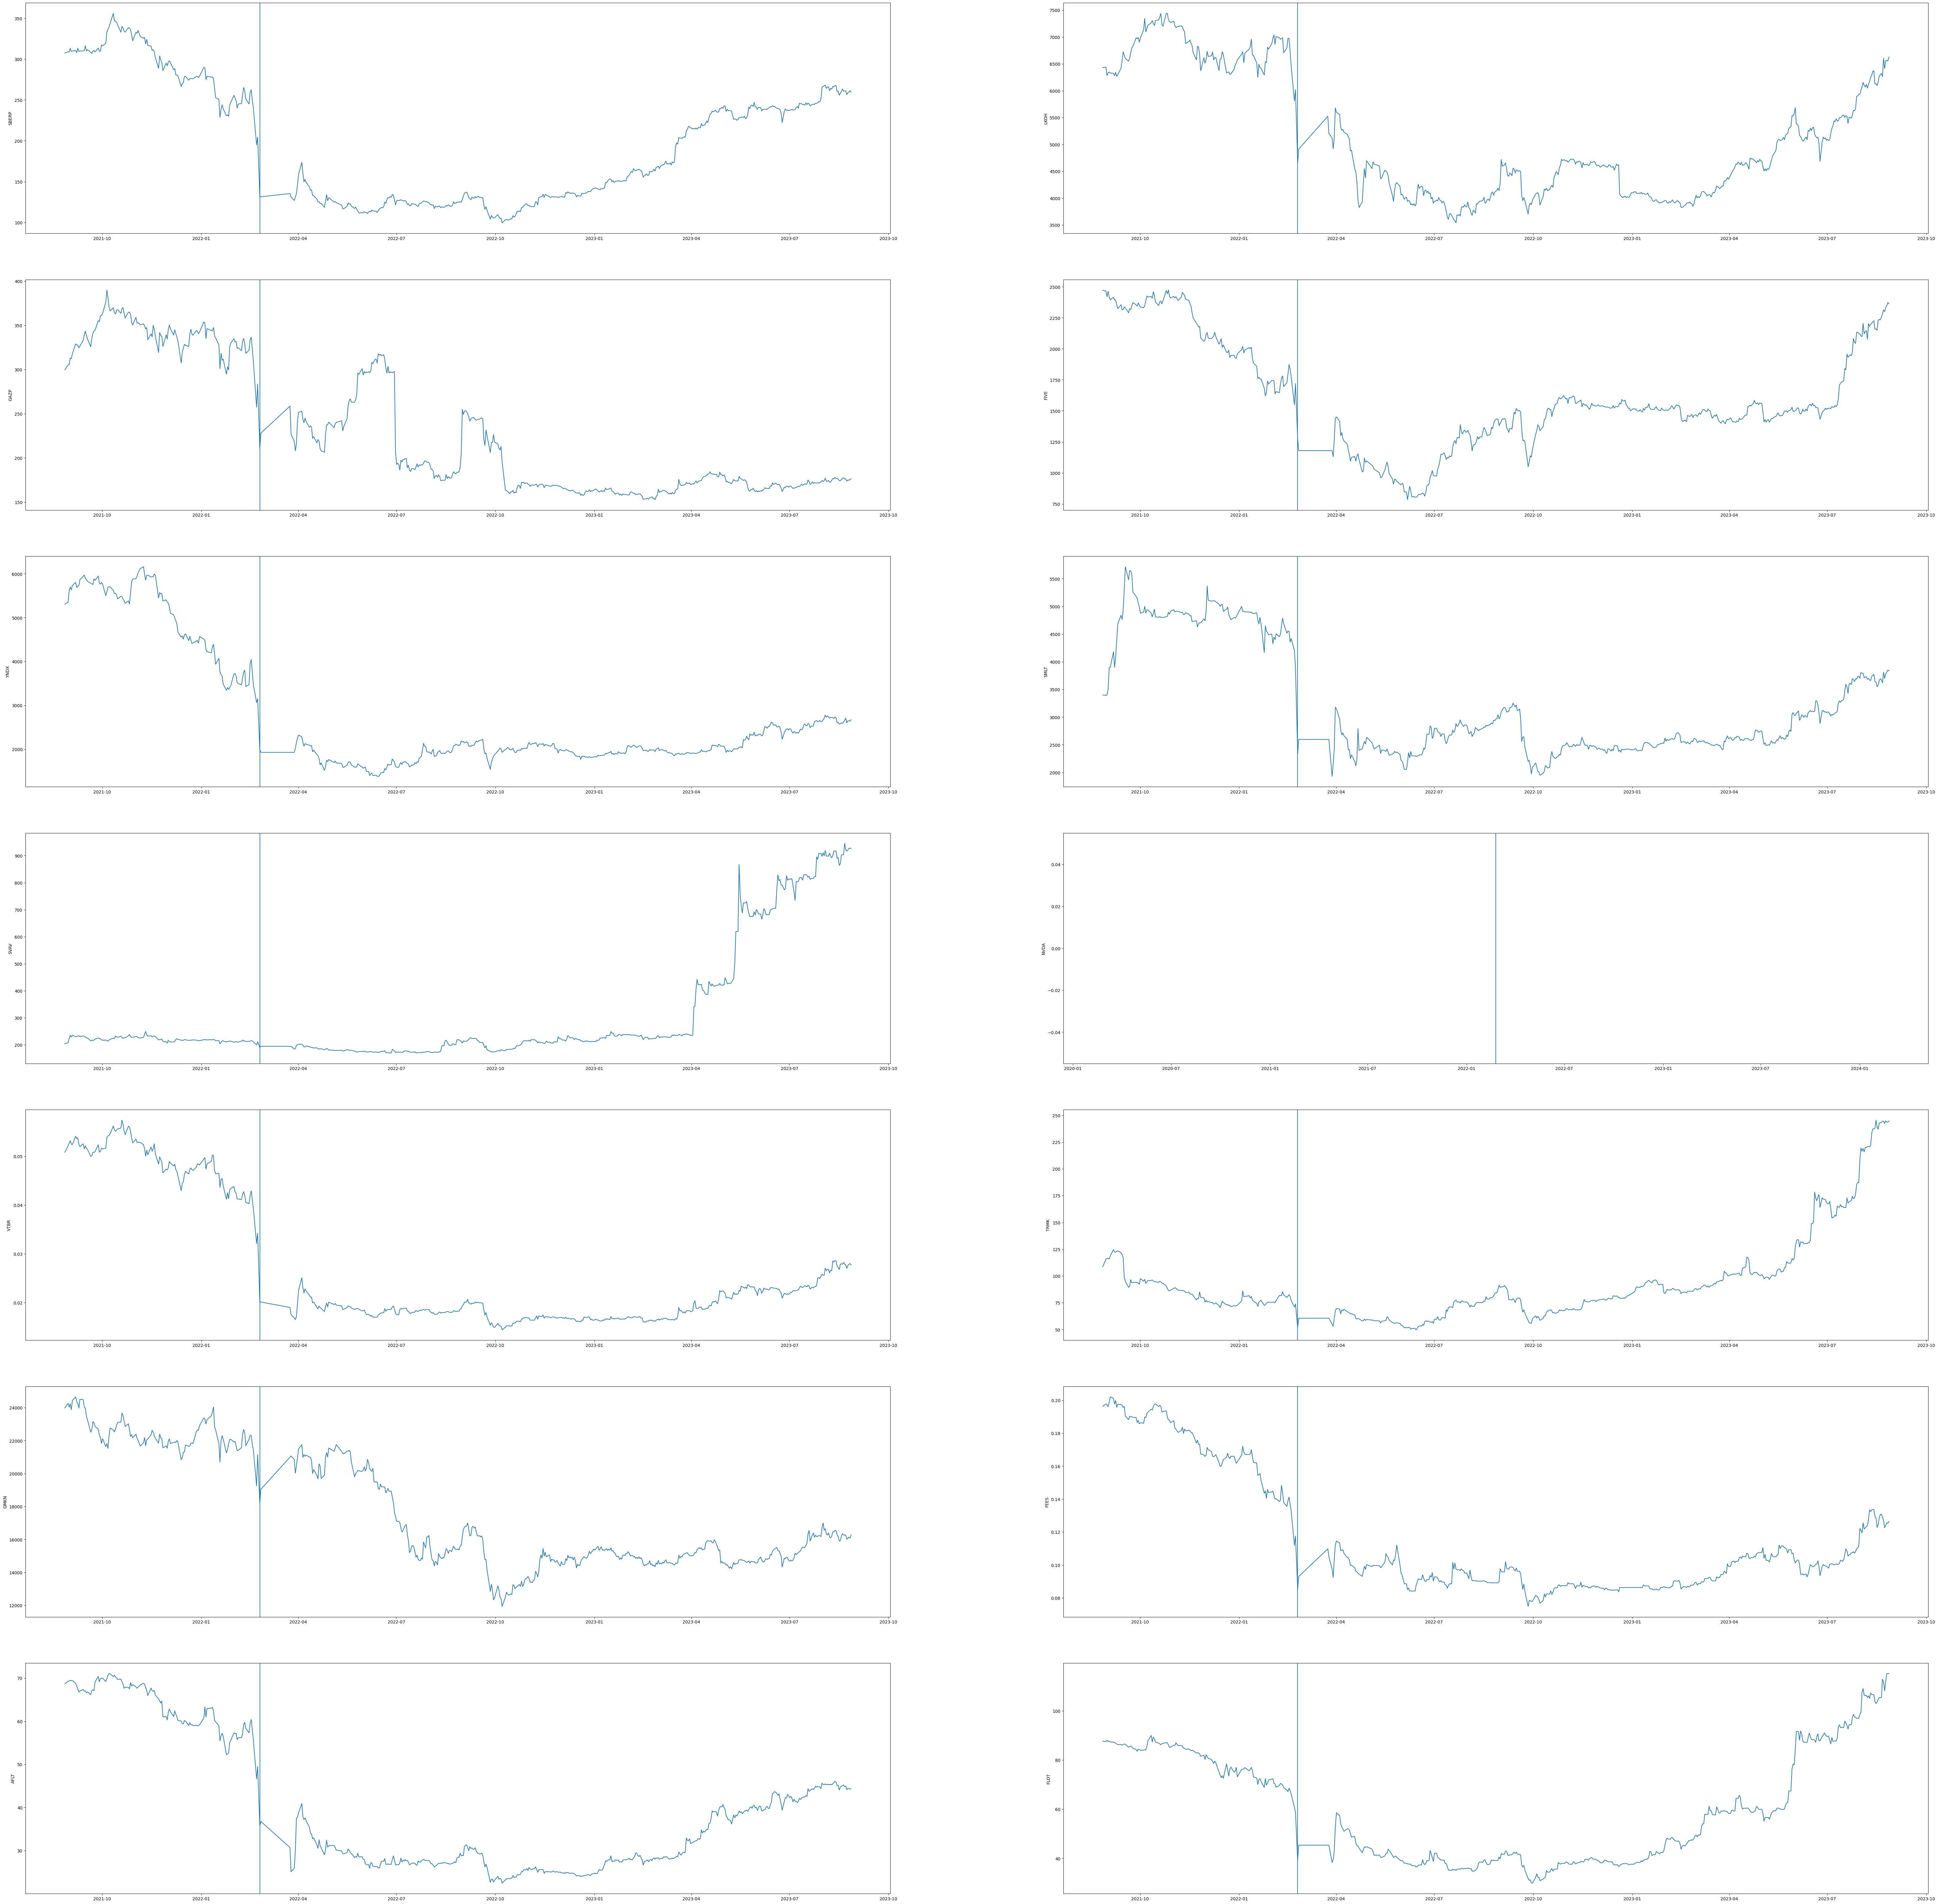

In [29]:
portfolio_plot(portfolio=close, event_date=date)

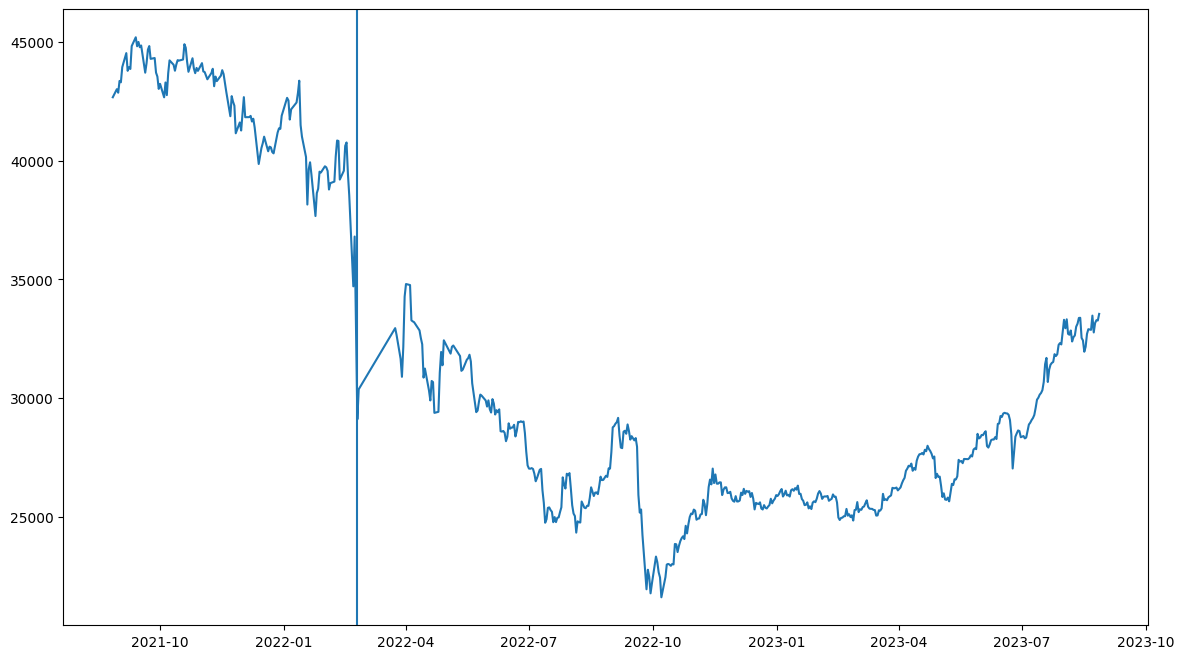

In [30]:
market_plot(market=close.market, event_date=date)

## Calculate tests

In [31]:
result_multiple_skew = skewness_corrected_test(portfolio=close, event_date=date, method='aar')

result_multiple_crude = crude_dependence(portfolio=close, event_date=date, method='aar')

result_multiple_cross_sectional = multiple_cross_sectional_test(portfolio=close, event_date=date, method='aar')

result_single_t_test = single_t_test(portfolio=close, event_date=date)

result_single_criterion = single_criterion_t_test(portfolio=close, event_date=date)

## Skewness test:

In [32]:
display(result_multiple_skew)

,aar,t_stat,p_value,significant
time,,,,
2022-02-16 07:00:00+00:00,0.009308,1.863746,0.085097,False
2022-02-17 07:00:00+00:00,-0.003856,-1.006452,0.332565,False
2022-02-18 07:00:00+00:00,-0.012804,-2.448775,0.029280,True
2022-02-21 07:00:00+00:00,-0.029243,-2.757363,0.016307,True
2022-02-22 07:00:00+00:00,-0.009700,-0.766186,0.457253,False
2022-02-24 07:00:00+00:00,-0.089524,-3.781631,0.002286,True
2022-02-25 07:00:00+00:00,0.009644,0.506302,0.621122,False
2022-03-24 07:00:00+00:00,-0.046855,-2.083308,0.057528,False
2022-03-25 07:00:00+00:00,-0.030285,-2.037585,0.062479,False


## Crude-dependence test:

In [33]:
display(result_multiple_crude)

,aar,t_stat,p_value,significant
time,,,,
2022-02-16 07:00:00+00:00,0.005589,1.864792,6.448281e-02,False
2022-02-17 07:00:00+00:00,-0.007574,-2.527131,1.270794e-02,True
2022-02-18 07:00:00+00:00,-0.016523,-5.512805,1.847933e-07,True
2022-02-21 07:00:00+00:00,-0.032961,-10.997632,0.000000e+00,True
2022-02-22 07:00:00+00:00,-0.013419,-4.477264,1.644849e-05,True
2022-02-24 07:00:00+00:00,-0.093242,-31.110564,0.000000e+00,True
2022-02-25 07:00:00+00:00,0.005925,1.976993,5.017496e-02,False
2022-03-24 07:00:00+00:00,-0.050574,-16.874094,0.000000e+00,True
2022-03-25 07:00:00+00:00,-0.034004,-11.345406,0.000000e+00,True


## Cross-sectional-test:

In [34]:
display(result_multiple_cross_sectional)

,AAR,t_stat,p_value,significant,idx
time,,,,,
2022-02-16 07:00:00+00:00,0.009015,1.713105,0.055212,False,-5
2022-02-17 07:00:00+00:00,-0.004148,-1.028543,0.161226,False,-4
2022-02-18 07:00:00+00:00,-0.013097,-2.448688,0.014643,True,-3
2022-02-21 07:00:00+00:00,-0.029536,-2.836825,0.007003,True,-2
2022-02-22 07:00:00+00:00,-0.009993,-0.753361,0.232330,False,-1
2022-02-24 07:00:00+00:00,-0.089817,-3.694355,0.001349,True,0
2022-02-25 07:00:00+00:00,0.009351,0.500163,0.312660,False,1
2022-03-24 07:00:00+00:00,-0.047148,-1.906822,0.039443,False,2
2022-03-25 07:00:00+00:00,-0.030578,-2.027127,0.031833,False,3


## T-test for first 3 stock in portfolio:

In [37]:
for i in range(3):

    print(' ')

    print(close.columns[i])

    display(result_single_t_test[i])
    
    print('___________________________________________________________________________')

 
SBERP


,AR,t_stat,p_value,significant,idx
time,,,,,
2022-02-16 07:00:00+00:00,0.019207,1.243669,2.160659e-01,False,-5
2022-02-17 07:00:00+00:00,-0.001581,-0.102385,9.186232e-01,False,-4
2022-02-18 07:00:00+00:00,-0.004061,-0.262924,7.930637e-01,False,-3
2022-02-21 07:00:00+00:00,-0.065136,-4.217501,4.843365e-05,True,-2
2022-02-22 07:00:00+00:00,-0.011797,-0.763879,4.464511e-01,False,-1
2022-02-24 07:00:00+00:00,-0.106479,-6.894438,2.771208e-10,True,0
2022-02-25 07:00:00+00:00,-0.045408,-2.940166,3.942237e-03,True,1
2022-03-24 07:00:00+00:00,-0.055980,-3.624666,4.269344e-04,True,2
2022-03-25 07:00:00+00:00,-0.013462,-0.871662,3.851481e-01,False,3


___________________________________________________________________________
 
LKOH


,AR,t_stat,p_value,significant,idx
time,,,,,
2022-02-16 07:00:00+00:00,-0.001710,-0.133951,0.893667,False,-5
2022-02-17 07:00:00+00:00,-0.002208,-0.172939,0.862993,False,-4
2022-02-18 07:00:00+00:00,-0.016801,-1.315795,0.190772,False,-3
2022-02-21 07:00:00+00:00,-0.007286,-0.570605,0.569343,False,-2
2022-02-22 07:00:00+00:00,-0.015824,-1.239294,0.217675,False,-1
2022-02-24 07:00:00+00:00,-0.035065,-2.746119,0.006967,True,0
2022-02-25 07:00:00+00:00,0.020422,1.599359,0.112393,False,1
2022-03-24 07:00:00+00:00,0.050016,3.917000,0.000150,True,2
2022-03-25 07:00:00+00:00,-0.047186,-3.695405,0.000333,True,3


___________________________________________________________________________
 
GAZP


,AR,t_stat,p_value,significant,idx
time,,,,,
2022-02-16 07:00:00+00:00,-0.011601,-0.657855,5.119021e-01,False,-5
2022-02-17 07:00:00+00:00,-0.015135,-0.858251,3.924790e-01,False,-4
2022-02-18 07:00:00+00:00,-0.030128,-1.708467,9.015681e-02,False,-3
2022-02-21 07:00:00+00:00,-0.062203,-3.527396,5.971354e-04,True,-2
2022-02-22 07:00:00+00:00,0.011547,0.654813,5.138521e-01,False,-1
2022-02-24 07:00:00+00:00,-0.017496,-0.992165,3.231303e-01,False,0
2022-02-25 07:00:00+00:00,0.016318,0.925352,3.566557e-01,False,1
2022-03-24 07:00:00+00:00,0.013442,0.762238,4.474259e-01,False,2
2022-03-25 07:00:00+00:00,-0.127279,-7.217715,5.382517e-11,True,3


___________________________________________________________________________


## Change event date on date when nothing happened

In [38]:
close = pd.read_csv('data_import/datasets/close_portfolio.csv', index_col='time')

close['market'] = [close.iloc[i].sum() for i in range(len(close))]

close.index = pd.to_datetime(close.index)

date = pd.to_datetime('2023-01-20 07:00:00+00:00')

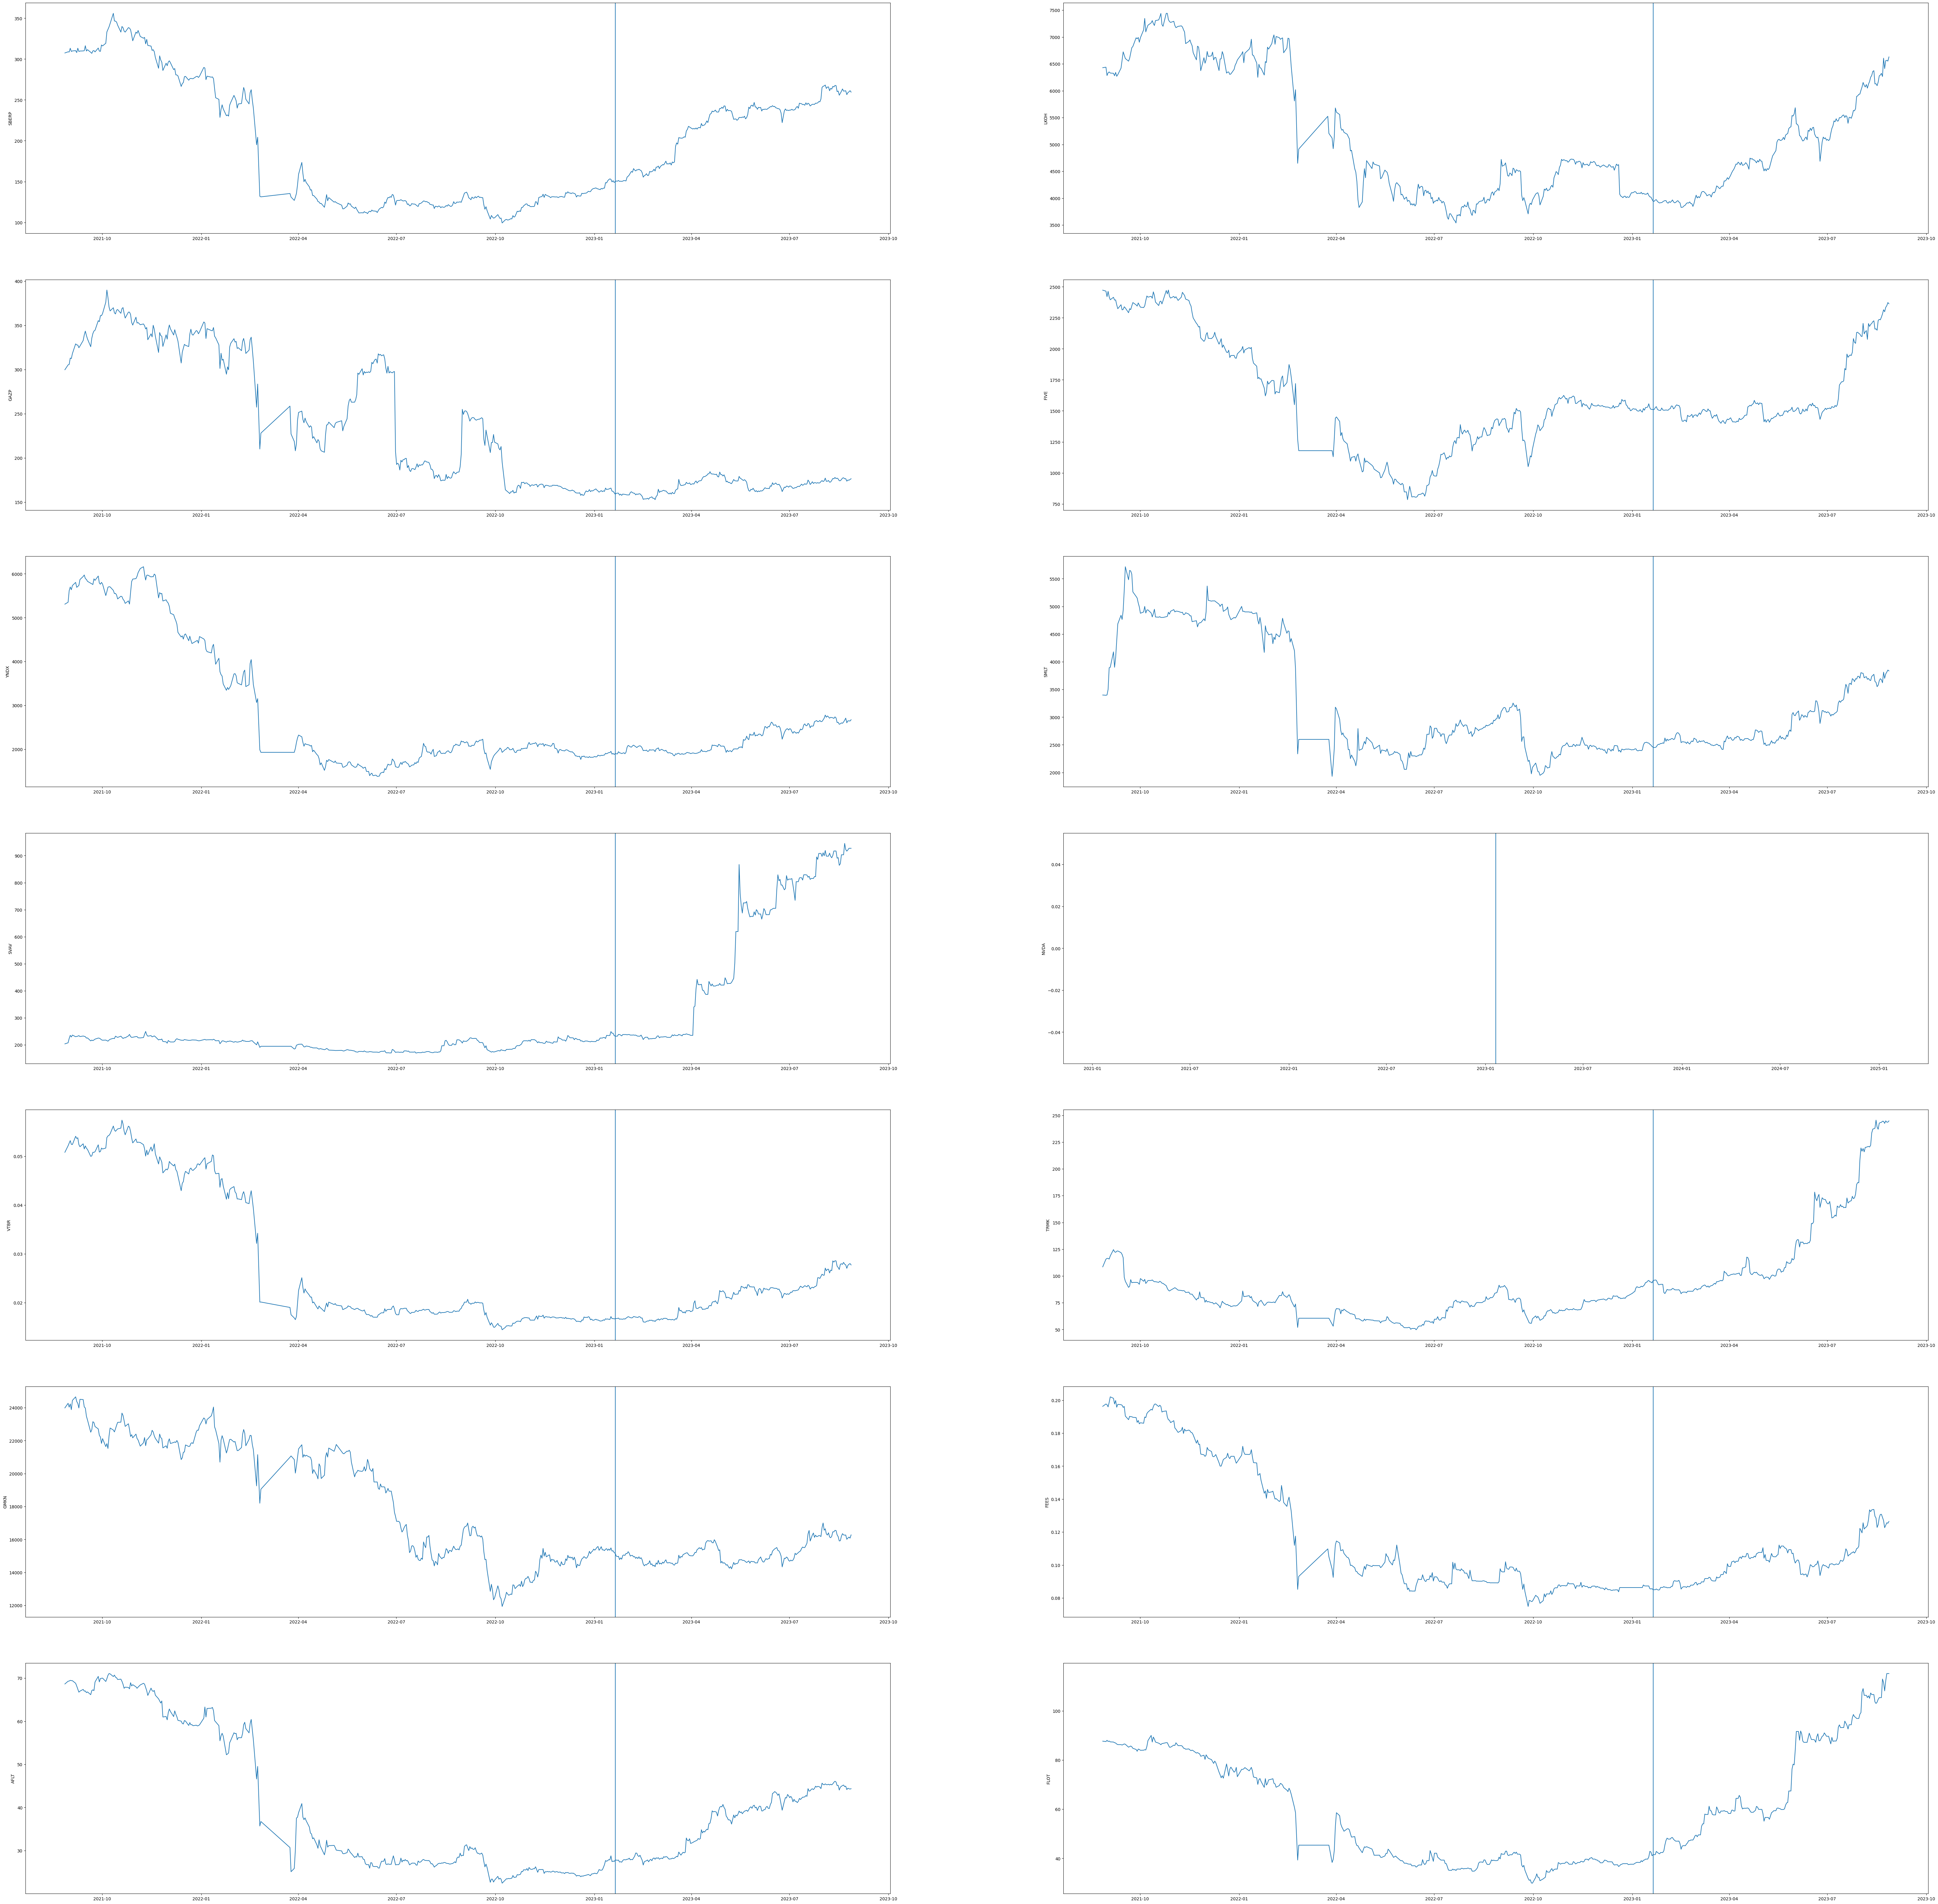

In [39]:
portfolio_plot(portfolio=close, event_date=date)

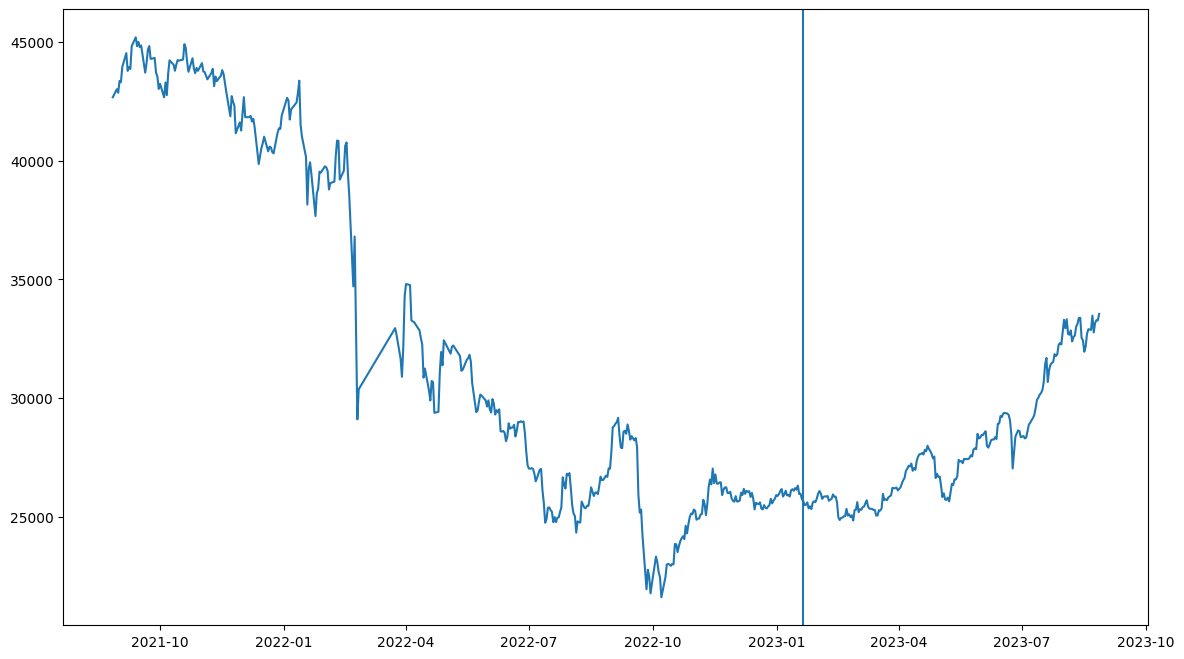

In [40]:
market_plot(market=close.market, event_date=date)

## Calculate tests

In [41]:
result_multiple_skew = skewness_corrected_test(portfolio=close, event_date=date, method='aar')

result_multiple_crude = crude_dependence(portfolio=close, event_date=date, method='aar')

result_multiple_cross_sectional = multiple_cross_sectional_test(portfolio=close, event_date=date, method='aar')

result_single_t_test = single_t_test(portfolio=close, event_date=date)

result_single_criterion = single_criterion_t_test(portfolio=close, event_date=date)

## Skewness test:

In [42]:
display(result_multiple_skew)

,aar,t_stat,p_value,significant
time,,,,
2023-01-15 07:00:00+00:00,0.005492,1.805203,0.094245,False
2023-01-16 07:00:00+00:00,0.010812,2.042747,0.061901,False
2023-01-17 07:00:00+00:00,-0.000690,-0.084412,0.934015,False
2023-01-18 07:00:00+00:00,0.002207,0.623784,0.543560,False
2023-01-19 07:00:00+00:00,-0.001587,-0.289492,0.776771,False
2023-01-20 07:00:00+00:00,0.006344,1.671587,0.118489,False
2023-01-21 07:00:00+00:00,0.007960,2.906095,0.012264,True
2023-01-22 07:00:00+00:00,0.003134,1.155564,0.268657,False
2023-01-23 07:00:00+00:00,0.007400,1.907975,0.078726,False


## Crude-dependence test:

In [43]:
display(result_multiple_crude)

,aar,t_stat,p_value,significant
time,,,,
2023-01-15 07:00:00+00:00,0.001583,0.963429,0.337135,False
2023-01-16 07:00:00+00:00,0.006904,4.201260,0.000049,True
2023-01-17 07:00:00+00:00,-0.004599,-2.798690,0.005919,True
2023-01-18 07:00:00+00:00,-0.001701,-1.035326,0.302453,False
2023-01-19 07:00:00+00:00,-0.005495,-3.344159,0.001081,True
2023-01-20 07:00:00+00:00,0.002436,1.482321,0.140694,False
2023-01-21 07:00:00+00:00,0.004051,2.465487,0.014997,True
2023-01-22 07:00:00+00:00,-0.000775,-0.471504,0.638077,False
2023-01-23 07:00:00+00:00,0.003491,2.124620,0.035526,True


## Cross-sectional-test:

In [44]:
display(result_multiple_cross_sectional)

,AAR,t_stat,p_value,significant,idx
time,,,,,
2023-01-15 07:00:00+00:00,0.003216,1.960347,0.035872,False,-5
2023-01-16 07:00:00+00:00,0.008536,1.557896,0.071631,False,-4
2023-01-17 07:00:00+00:00,-0.002966,-0.462912,0.325541,False,-3
2023-01-18 07:00:00+00:00,-0.000069,-0.032129,0.487429,False,-2
2023-01-19 07:00:00+00:00,-0.003863,-1.213685,0.123229,False,-1
2023-01-20 07:00:00+00:00,0.004068,1.718538,0.054703,False,0
2023-01-21 07:00:00+00:00,0.005684,3.074843,0.004433,True,1
2023-01-22 07:00:00+00:00,0.000858,0.564995,0.290848,False,2
2023-01-23 07:00:00+00:00,0.005124,1.376472,0.095961,False,3


## T-test for first 3 stock in portfolio:

In [45]:
for i in range(3):

    print(' ')

    print(close.columns[i])

    display(result_single_t_test[i])
    
    print('___________________________________________________________________________')

 
SBERP


,AR,t_stat,p_value,significant,idx
time,,,,,
2023-01-15 07:00:00+00:00,-0.007847,-0.665151,0.507241,False,-5
2023-01-16 07:00:00+00:00,-0.025761,-2.183642,0.030951,True,-4
2023-01-17 07:00:00+00:00,-0.023510,-1.992819,0.048570,True,-3
2023-01-18 07:00:00+00:00,-0.006451,-0.546783,0.585551,False,-2
2023-01-19 07:00:00+00:00,-0.021893,-1.855753,0.065963,False,-1
2023-01-20 07:00:00+00:00,-0.006049,-0.512777,0.609058,False,0
2023-01-21 07:00:00+00:00,-0.004339,-0.367831,0.713653,False,1
2023-01-22 07:00:00+00:00,-0.018450,-1.563936,0.120488,False,2
2023-01-23 07:00:00+00:00,-0.013860,-1.174855,0.242398,False,3


___________________________________________________________________________
 
LKOH


,AR,t_stat,p_value,significant,idx
time,,,,,
2023-01-15 07:00:00+00:00,0.000502,0.035520,0.971725,False,-5
2023-01-16 07:00:00+00:00,-0.021967,-1.553189,0.123034,False,-4
2023-01-17 07:00:00+00:00,-0.002497,-0.176544,0.860167,False,-3
2023-01-18 07:00:00+00:00,-0.007430,-0.525329,0.600332,False,-2
2023-01-19 07:00:00+00:00,-0.009510,-0.672444,0.502605,False,-1
2023-01-20 07:00:00+00:00,-0.013215,-0.934360,0.352010,False,0
2023-01-21 07:00:00+00:00,-0.001186,-0.083878,0.933294,False,1
2023-01-22 07:00:00+00:00,-0.000545,-0.038544,0.969319,False,2
2023-01-23 07:00:00+00:00,-0.007516,-0.531412,0.596124,False,3


___________________________________________________________________________
 
GAZP


,AR,t_stat,p_value,significant,idx
time,,,,,
2023-01-15 07:00:00+00:00,-0.008286,-0.355693,0.722700,False,-5
2023-01-16 07:00:00+00:00,-0.014250,-0.611691,0.541909,False,-4
2023-01-17 07:00:00+00:00,-0.028338,-1.216402,0.226239,False,-3
2023-01-18 07:00:00+00:00,-0.014846,-0.637275,0.525170,False,-2
2023-01-19 07:00:00+00:00,-0.019874,-0.853081,0.395328,False,-1
2023-01-20 07:00:00+00:00,-0.022842,-0.980508,0.328825,False,0
2023-01-21 07:00:00+00:00,-0.003587,-0.153962,0.877900,False,1
2023-01-22 07:00:00+00:00,-0.012855,-0.551819,0.582107,False,2
2023-01-23 07:00:00+00:00,-0.015967,-0.685387,0.494433,False,3


___________________________________________________________________________


## As you can see while market price going down, SBERP is growing thats why -4 and -3 indexes in SBERP are True

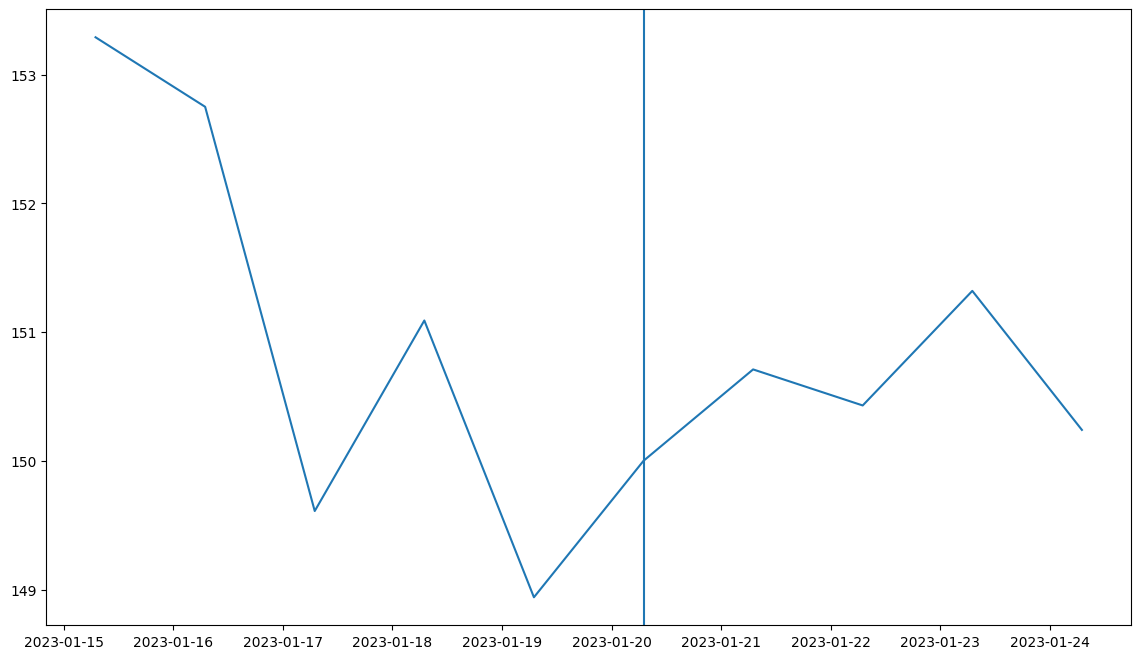

In [53]:
import matplotlib.pyplot as plt

ev_idx = close.index.get_loc(date)
plt.figure(figsize=(14, 8))
plt.plot(close.iloc[:, 0][ev_idx - 5:ev_idx + 5])
plt.axvline(date)

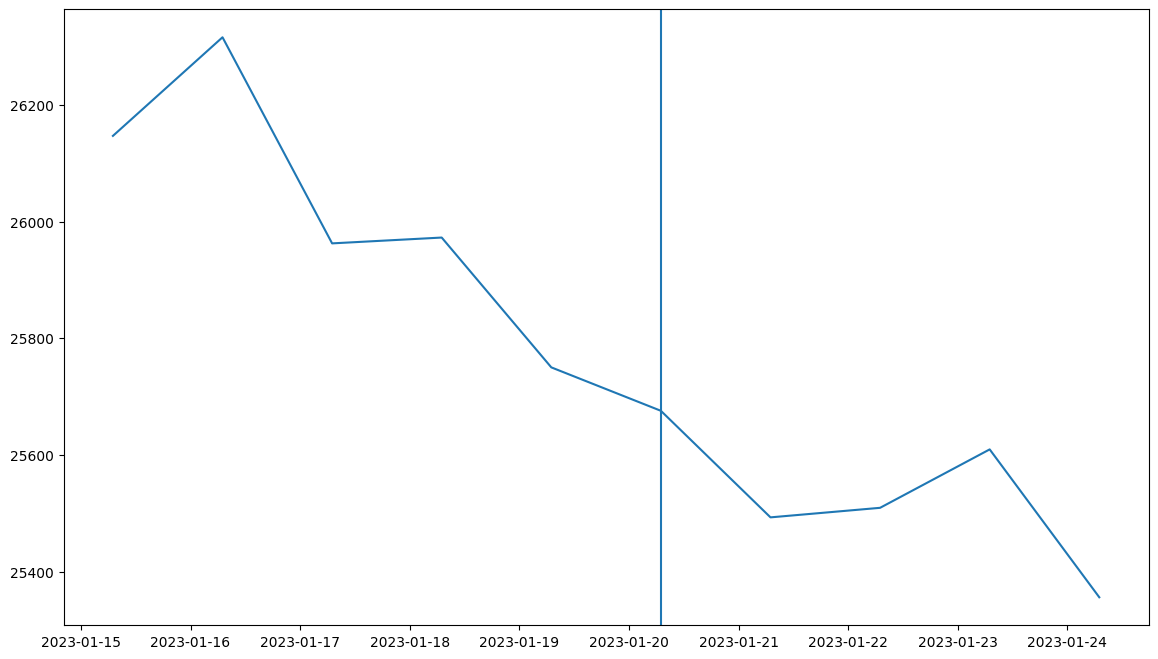

In [55]:
plt.figure(figsize=(14, 8))
plt.plot(close.market[ev_idx - 5: ev_idx + 5])
plt.axvline(date)

## Sharpe(Markowitz) optimization portfolio model

In [8]:
portfolio = close.iloc[:, :-1] # no include market

min_risk = min_risk_portfolio_model(portfolio=portfolio)

max_sharpe = max_sharpe_rate_portfolio(portfolio=portfolio)

### $\sigma \to \min$ propotions of shares in portfolio

In [9]:
min_risk[0]

,SBERP,LKOH,GAZP,FIVE,YNDX,SMLT,SVAV,VTBR,TRMK,GMKN,FEES,AFLT,FLOT
proportions,-0.024969,0.137975,0.018771,0.069838,-0.009114,-0.002959,0.127994,-0.227573,-0.007469,0.64203,-0.007962,0.170911,0.112527


### $\sigma \to \min$ return and risk

In [10]:
min_risk[1]

Params(ret=0.00030357259340160124, risk=0.01639510601995203)

### Sharpe ratio $U(r, \sigma) = \frac{r}{\sigma} \to \max$ proportions of shares in portfolio

In [11]:
max_sharpe[0]

,SBERP,LKOH,GAZP,FIVE,YNDX,SMLT,SVAV,VTBR,TRMK,GMKN,FEES,AFLT,FLOT
proportions,2.358617,1.562169,-0.140823,1.242308,-1.595526,0.474556,2.204853,-2.272113,2.087832,-3.11029,-1.381107,-1.041178,0.610702


### Sharpe ratio $U(r, \sigma) = \frac{r}{\sigma} \to \max$ return and risk

In [12]:
max_sharpe[1]

Params(ret=0.016976019813332945, risk=0.12260294031183765)